In [1]:
library(rethinking)

Loading required package: cmdstanr

This is cmdstanr version 0.6.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /root/.cmdstan/cmdstan-2.33.1

- CmdStan version: 2.33.1

Loading required package: posterior

This is posterior version 1.4.1


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.40)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [2]:
## R code 2.1
ways <- c( 0 , 3 , 8 , 9 , 0 )
ways/sum(ways)

[1] 0.00 0.15 0.40 0.45 0.00

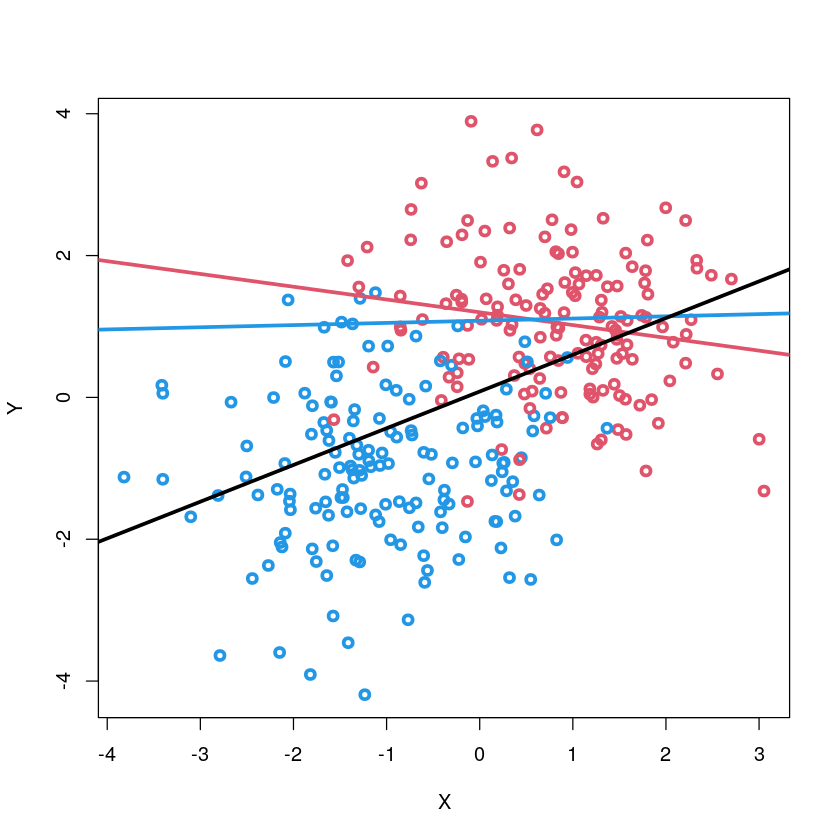

In [11]:
cols <- c(4,2)

N <- 300
Z <- rbern(N)
X <- rnorm(N, 2*Z-1)
Y <- rnorm(N, 2*Z-1)

plot( X , Y, col=cols[Z+1] , lwd=3)

abline(lm(Y[Z==1]~X[Z==1]),col=2, lwd=3)

abline(lm(Y[Z==1]~X[Z==0]),col=4, lwd=3)

abline(lm(Y~X),lwd=3)

In [5]:
# load data and copy
library(rethinking)
data(WaffleDivorce)
d <- WaffleDivorce

# standardize variables
d$D <- standardize( d$Divorce )
d$M <- standardize( d$Marriage )
d$A <- standardize( d$MedianAgeMarriage )

In [7]:
sd( d$MedianAgeMarriage )

[1] 1.24363

In [13]:
m5.1 <- quap(
    alist(
        D ~ dnorm(mu, sigma),
        mu <- a + bA * A ,
        a ~ dnorm(0 , 0.2) ,
        bA ~ dnorm(0, 0.5),
        sigma ~ dexp(1)
    ), data = d
)

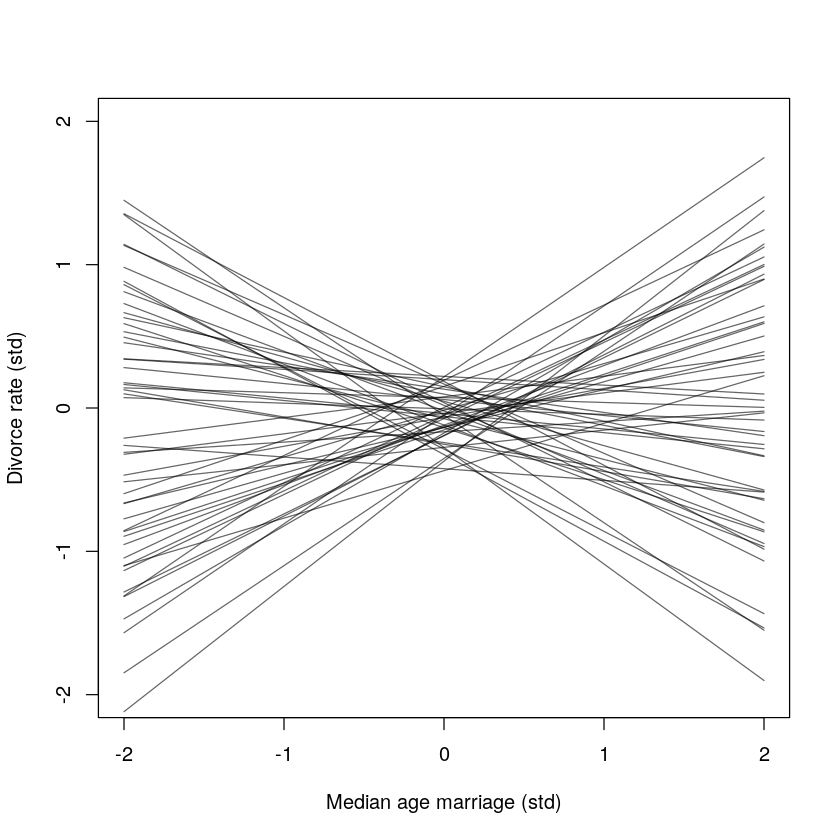

In [20]:
set.seed(10)
prior <- extract.prior(m5.1)
mu <- link(m5.1, post=prior, data=list(A=c(-2,2)))
plot(NULL, xlim=c(-2,2), ylim=c(-2,2), xlab="Median age marriage (std)", ylab="Divorce rate (std)")
for (i in 1:50) lines(c(-2,2), mu[i,], col=col.alpha('black', 0.6))

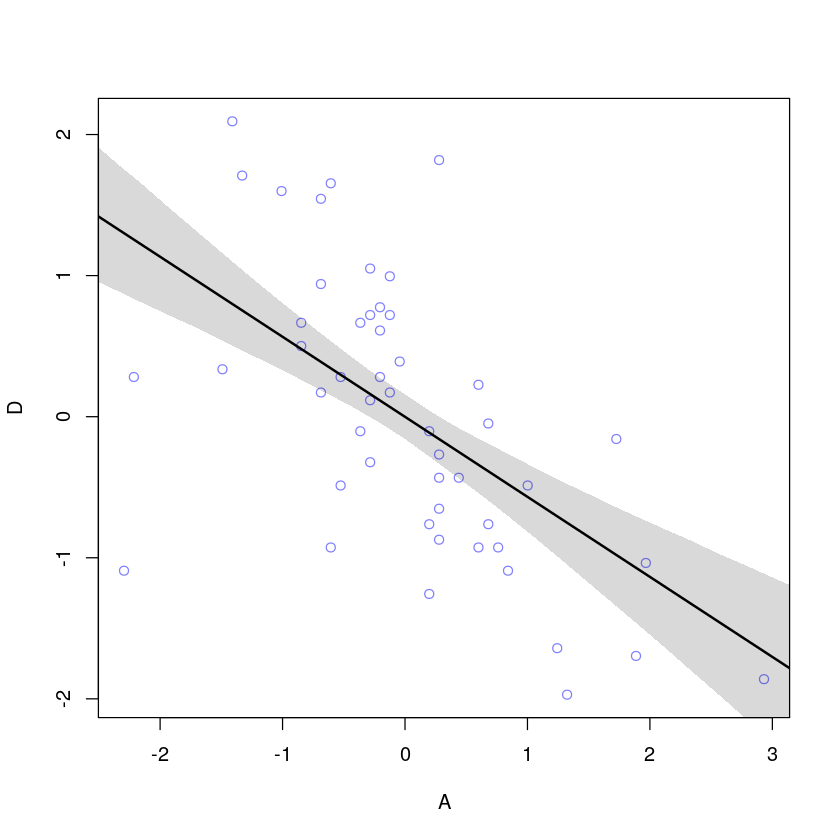

In [21]:
# compute percentile interval of mean
A_seq <- seq( from=-3 , to=3.2 , length.out=30 )
mu <- link( m5.1 , data=list(A=A_seq) )
mu.mean <- apply( mu , 2, mean )
mu.PI <- apply( mu , 2 , PI )
# plot it all
plot( D ~ A , data=d , col=rangi2 )
lines( A_seq , mu.mean , lwd=2 )
shade( mu.PI , A_seq )

In [ ]:
m5.2 <- quap(
alist(
D ~ dnorm( mu , sigma ) ,
mu <- a + bM * M ,
a ~ dnorm( 0 , 0.2 ) ,
bM ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data = d )